<a href="https://colab.research.google.com/github/laurenwinslett/helloAI/blob/main/ASSIGNMENT2_darkness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from tensorflow.keras.datasets import mnist
np.set_printoptions(linewidth=np.inf)
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
print(X_train.shape)
print(Y_train.shape)
print(X_train[0].shape)
print(X_train[2])
print(Y_train[2])

# example: pre-process to convert into valid inputs for a neural network
listof10s = [(x+1)*10 for x in range(10)]
print(listof10s)
X_train_2d = [x/255.0 for x in X_train]
print(X_train_2d[2])

# example: convert each image into 1d "flattened" vector of inputs
X_train_flat = np.reshape(X_train_2d, (60000,784,1))
print(X_train_flat[2])

(60000, 28, 28)
(60000,)
(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  67 232  39   0   0   0   0   0]
 [  0   0   0   0  62  81   0   0   0   0   0   0   0   0   0   0   0   0   0   0 120 180  39   0   0   0   0   0]
 [  0   0   0   0 126 163   0   0   0   0   0   0   0   0   0   0   0   0   0   2 153 210  40   0   0   0   0   0]
 [  0   0   0   0 220 163   0   0   0   0   0 

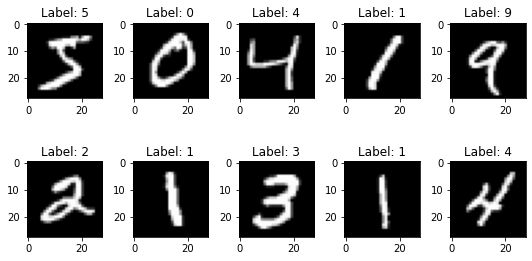

In [4]:
# use matplotlib to draw the first 10 images in 2 rows and 5 cols
# use/modify the code here: https://medium.com/the-data-science-publication/how-to-plot-mnist-digits-using-matplotlib-65a2e0cc068
from tensorflow.keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
import matplotlib.pyplot as plt
%matplotlib inline
num = 10
images = X_train[:num]
labels = Y_train[:num]
num_row = 2
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i], cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()
images = X_train[0:10]


In [5]:
# count how many digits are in Y_train
counts = [0]*10
for y in Y_train:
  counts[y] = counts[y] + 1
print(counts)

# count how manyu digits are in Y_test
t_counts = [0]*10
for y in Y_test:
  t_counts[y] = t_counts[y] + 1
print(t_counts)

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]


In [6]:
# create a function that calculates the darkness of a single image
# only works on 28x28 images
def calcDarkness(x):
  total = 0
  for r in range(28):
    for c in range(28):
      total = total + x[r][c]
  return total

In [7]:
# test our darkness function
print(calcDarkness(X_train[0]))
print(Y_train[0])
darknesses = [0]*10
# loop through all the training images
for x, y in zip(X_train, Y_train):
  darkness = calcDarkness(x)
  darknesses[y] = darknesses[y] + darkness 

darknesses1 = [darknesstotal/counts[i] for i, darknesstotal in enumerate(darknesses)]
darknesses2 = [dt/cnt for cnt, dt in zip(counts, darknesses)]
print(darknesses1)
print(darknesses2)
darknesses=darknesses1

27525
5
[34665.99307783218, 15193.648620587363, 29783.10775427996, 28294.706246941772, 24263.40893529613, 25739.57885998893, 27449.37090233187, 22896.377334397446, 30019.183900188003, 24508.181375021013]
[34665.99307783218, 15193.648620587363, 29783.10775427996, 28294.706246941772, 24263.40893529613, 25739.57885998893, 27449.37090233187, 22896.377334397446, 30019.183900188003, 24508.181375021013]


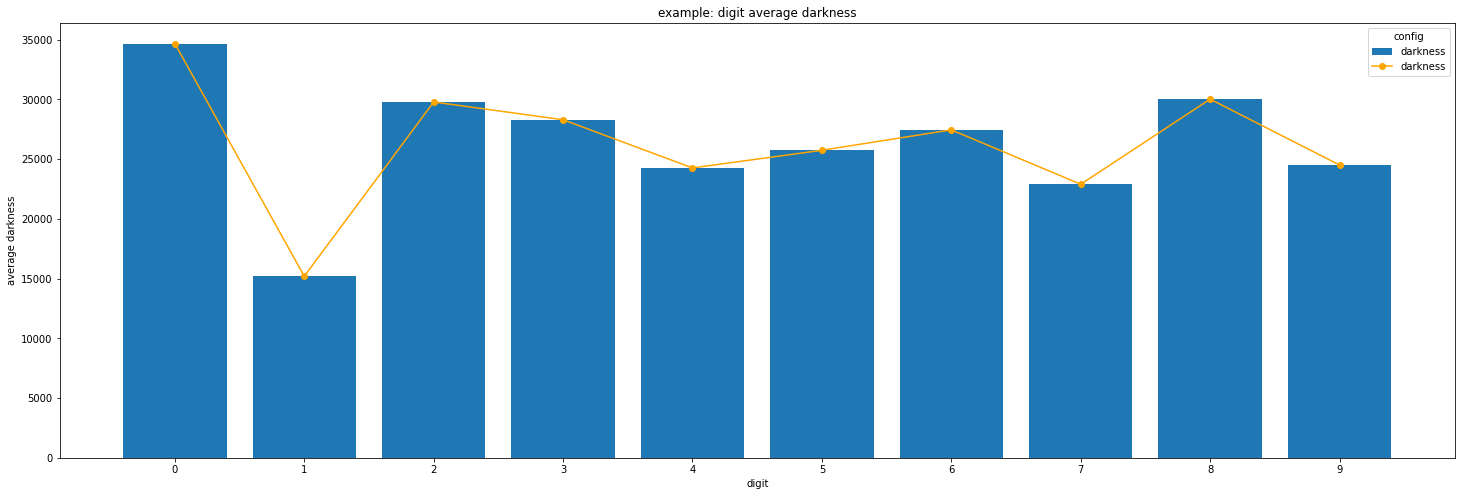

In [8]:
# use matplot lib to plot the average darkness of each digit ... 
# this is NOT part of the assignment, but it gives you some example code for working with matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 8))
digits = [f"{i}" for i in range(10)]
p1 = ax.bar(digits,darknesses, label="darkness")
p2, = ax.plot(digits,darknesses, color='orange', label="darkness", marker='o')
ax.legend(handles=[p1, p2],loc='upper right',title='config') 
ax.set_xlabel("digit")
ax.set_ylabel("average darkness")
plt.title("example: digit average darkness")
plt.show()

In [9]:
def findClosest(darkness):
  diffs = darknesses-darkness
  return(np.argmin(np.abs(diffs))) 

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


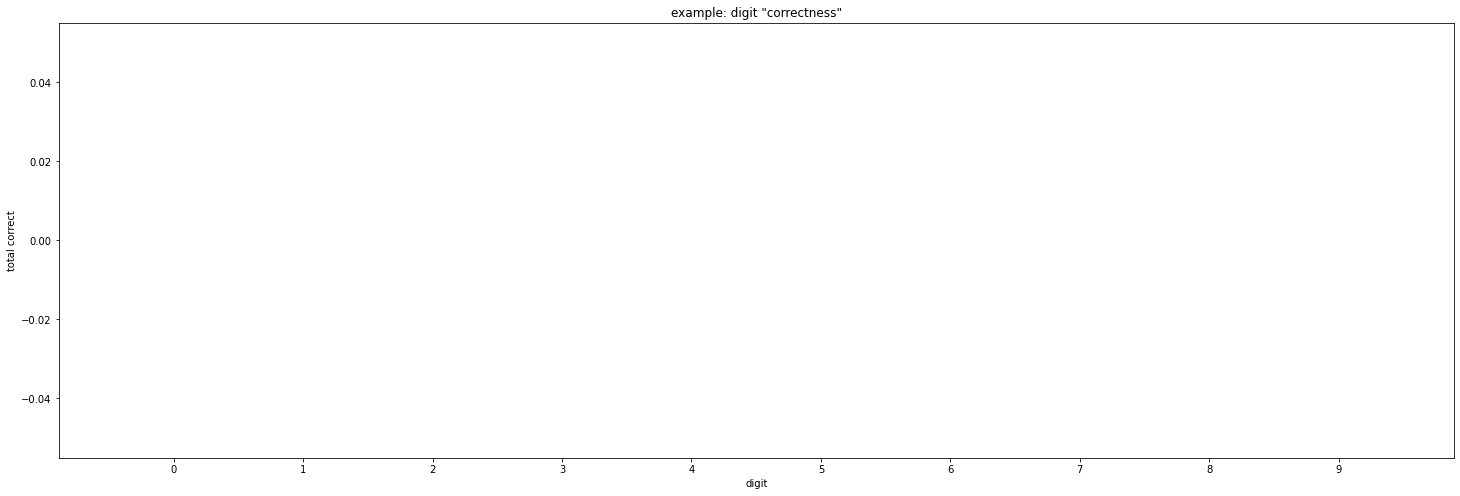

In [10]:
accuracies = [0]*10
for i in range(len(X_test)):
  x = X_test[i]
  label = Y_test[i]
  darknessX = calcDarkness(x)
  predictedlabel = findClosest(darknessX)
  # ... now you should take the darkness you calculated for this image … compare it to  the other “average” darknesses for each digit
  # ... pick the digit that this darkness is closest to
  # ... does that digit match the label? If so, increment a count of how many images you’ve classified correctly ...
  # ... note that there are 10 different accuracy counts (one for each digit, so every time you get a prediction correct, update the appropriate accuracy count)
if label == predictedlabel:
  accuracies = [1]*10
# now put your pyplot here AFTER the for loop (i.e., not indented)
# use the digits below as the x axis and your accuracies as the y axis

# setup the x-axis
digits = [f"{i}" for i in range(10)] # list comprehension that creates the digits as strings so that they all show up on the x axis

# look at the examples to see how to plot something once you have the x-axis (digits) and the y-axis (accuracies)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(25, 8))
print(digits)
ax.bar(digits,accuracies, label="accuracies (raw count)")
ax.set_xlabel("digit")
ax.set_ylabel("total correct")
plt.title("example: digit \"correctness\"")
plt.show()